# Naming Clusters

## aims
* name topics and compare the different names
* test agaisnt the most relevent documents
* compare these named topics to the masculinities in cyberspace
* maybe inter-relation 
* maybe some standout terms

## method

Find the most differential words, name the topic, test the topic, look into how they link to each other. 

## questions 

1. Are there distinct topics?
2. Are these topics linked with the masculinities in cyberspace?
3. Are these topics linked to insights or re-enforcements within interelation?

In [1]:
from gensim import corpora, models, similarities
import gensim
import logging
import stop_words
import nltk
import string
import os
from nltk.stem import WordNetLemmatizer
import numpy as np
import numpy
import pickle
from operator import itemgetter
import pandas as pd

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# wordnet_lemmatizer = WordNetLemmatizer()

C:\Python27\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# lda1 = gensim.models.ldamodel.LdaModel.load("data2lda30.lda")
lda2 = gensim.models.ldamodel.LdaModel.load("data2lda20.lda")
lda1 = gensim.models.ldamodel.LdaModel.load("HDA_Model.hda")


with open("corp.cor") as cp: 
    corp = pickle.load(cp)
with open("sentances2.sent") as sent: 
    sentances = pickle.load(sent)
dictionary = gensim.corpora.dictionary.Dictionary.load("Dicktionary")

2017-10-27 20:59:46,842 : INFO : loading LdaModel object from data2lda20.lda
2017-10-27 20:59:46,855 : INFO : loading expElogbeta from data2lda20.lda.expElogbeta.npy with mmap=None
2017-10-27 20:59:46,865 : INFO : setting ignored attribute id2word to None
2017-10-27 20:59:46,871 : INFO : setting ignored attribute state to None
2017-10-27 20:59:46,872 : INFO : setting ignored attribute dispatcher to None
2017-10-27 20:59:46,875 : INFO : loaded data2lda20.lda
2017-10-27 20:59:46,881 : INFO : loading LdaModel object from data2lda20.lda.state
2017-10-27 20:59:46,913 : INFO : loaded data2lda20.lda.state
2017-10-27 20:59:46,990 : INFO : loading LdaModel object from HDA_Model.hda
2017-10-27 20:59:48,845 : INFO : loading id2word recursively from HDA_Model.hda.id2word.* with mmap=None
2017-10-27 20:59:48,845 : INFO : loaded HDA_Model.hda
2017-10-27 20:59:48,848 : INFO : loading LdaModel object from HDA_Model.hda.state
2017-10-27 20:59:48,852 : WARNING : failed to load state from HDA_Model.hda.s

In [4]:
for x in lda1.show_topics(20):
    print x

lda1.name_dict = {
    0: "US politics / Political Gender",
    1: "Relationships and Sex",
    2: "Learning and male students",
    3: "Personal growth and life progressions", 
    4: "Bodybuilding and fitness",
    5: "Return Of Kings",
    6: "NavBar",
    7: "International Politics",
    8: "Alpha Guidence",
    9: "Feminism and stats",    
}


(0, u'0.019*men + 0.018*visit + 0.014*king + 0.012*great + 0.012*must + 0.012*government + 0.012*weapon + 0.011*vote + 0.011*grind + 0.010*lead + 0.009*rome + 0.008*girl + 0.008*find + 0.008*return + 0.007*] + 0.007*[ + 0.007*shooting + 0.007*la + 0.007*vega + 0.007*like')
(1, u'0.014*woman + 0.011*will + 0.009*men + 0.007*like + 0.006*get + 0.006*time + 0.006*people + 0.005*even + 0.005*girl + 0.005*just + 0.005*make + 0.005*life + 0.004*dont + 0.004*thing + 0.004*year + 0.004*world + 0.003*good + 0.003*much + 0.003*know + 0.003*go')
(2, u'0.026*rok + 0.021*will + 0.016*make + 0.014*red + 0.013*city + 0.013*level + 0.013*king + 0.013*month + 0.013*top + 0.013*testosterone + 0.013*increase + 0.013*post + 0.013*popular + 0.013*provide + 0.013*shirt + 0.013*shop + 0.013*size + 0.013*penis + 0.013*launch + 0.013*landed')
(3, u'0.012*woman + 0.012*will + 0.008*men + 0.007*like + 0.007*get + 0.006*time + 0.006*girl + 0.006*just + 0.006*people + 0.005*even + 0.005*make + 0.005*life + 0.005*d

In [5]:
for x in lda2.show_topics(20):
    print x

lda2.name_dict = {
    0: "Men victim of feminism",
    1: "Navbar",
    2: "Narrative and fiction",
    3: "Entreprenurs and future tech", 
    4: "ROK promotion",
    5: "Gym and Bodybuilding",
    6: "religious conservativism",
    7: "students and campus",
    8: "?",
    9: "Pickup Recounting",    
    10: "Western History",
    11: "US Election",
    12: "Racial Violence",
    13: "Alpha Advice", 
    14: "International Politics",
    15: "Site Spam",
    16: "Gender Dynamics",
    17: "Students and Campus",
    18: "Site Spam",
    19: "?",
}


(0, u'0.016*"young" + 0.016*"victim" + 0.015*"meal" + 0.014*"thing" + 0.014*"something" + 0.014*"great" + 0.014*"better" + 0.013*"real" + 0.013*"leftist" + 0.013*"make"')
(1, u'0.045*"search" + 0.044*"/" + 0.043*"<" + 0.042*"moneysubmit" + 0.042*"homeculturemasculinitystoreaboutadvertisedonatesubmit" + 0.042*"sexestravelwisdomwork" + 0.042*"bodygamegirlshistorylifestylemindnewspoliticsreligionthe" + 0.042*"type=\'text/css" + 0.042*"media=\'all" + 0.042*"["')
(2, u'0.012*"story" + 0.011*"film" + 0.010*"like" + 0.008*"even" + 0.008*"movie" + 0.007*"drug" + 0.006*"the" + 0.006*"show" + 0.005*"hollywood" + 0.005*"video"')
(3, u'0.133*"s" + 0.103*"self-driving" + 0.013*"shouldnt" + 0.010*"regularly" + 0.010*"regime" + 0.009*"percent" + 0.008*"burn" + 0.008*"pound" + 0.008*"empire" + 0.008*"israel"')
(4, u'0.063*"rok" + 0.033*"will" + 0.031*"testosterone" + 0.031*"city" + 0.031*"post" + 0.031*"popular" + 0.031*"provide" + 0.031*"top" + 0.030*"red" + 0.030*"increase"')
(5, u'0.024*"body" + 0.

In [6]:
def findTopics(query, lda):
    vec_bow = dictionary.doc2bow(query)
    vec_lsi = lda.get_document_topics(vec_bow) # convert the query to LSI space
#     sims = sim_index[vec_lsi]
    vec_lsi = [list(x) for x in vec_lsi]
#     print vec_lsi
#     vec_lsi = vec_lsi.sort(key=itemgetter[1])
    return(vec_lsi) # print sorted (document number, similarity score) 2-tuples
    

THis is a % similarity... however, I want to implement a jaccard similairty to get a legit methodology. 

Looks like you take a binary ... wait. No, I dont understand it. 

In [7]:
topics_freqdist = []

for item in sentances: 
    try:
        ass_topic = findTopics(item, lda1)
        ass_topic.sort(key=itemgetter(1), reverse = True)
#         ass_topic = ass_topic[0][0]
#         print ass_topic
#         print ass_topic
        topics_freqdist.append(ass_topic)
#         print ""
    except Exception, e: 
        print e
    
# 
# print topics_freqdist[:100]


topics_freqdist2 = []

for item in sentances: 
    try:
        ass_topic = findTopics(item, lda2)
        ass_topic.sort(key=itemgetter(1), reverse = True)
#         ass_topic = ass_topic[0][0]
#         print ass_topic
#         print ass_topic
        topics_freqdist2.append(ass_topic)
#         print ""
    except Exception, e: 
        print e
    

# print topics_freqdist2

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attribute 'get_document_topics'
'HdpModel' object has no attrib

Just quickly, I want to find the strongest tag for each topic in the documents. 

How about taking all the times that the topic turns up, sort them and then return the top 5/4 in a nested dict?

In [8]:
topics1 = []

for doc in topics_freqdist: 
    for topic in doc: 
        topics1.append(topic[0])

topics1 = {key:[] for key in topics1}

for num, doc in enumerate(topics_freqdist): 
    for topic in doc: 
        topics1[topic[0]].append([num, topic[1]])

for topic in topics1:
    topics1[topic] = sorted(topics1[topic], key = itemgetter(1), reverse = True)
        
print topics1
print ""

#now lets do the same for the second grouping

topics2 = []

for doc in topics_freqdist2: 
    for topic in doc: 
        topics2.append(topic[0])

topics2 = {key:[] for key in topics2}

for num, doc in enumerate(topics_freqdist2): 
    for topic in doc: 
        topics2[topic[0]].append([num, topic[1]])

for topic in topics2:
    topics2[topic] = sorted(topics2[topic], key = itemgetter(1), reverse = True)
             
print topics2


{}



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


Now, lets manually inspect them to see the different documents... or try to! 

In [9]:
depth = 5

for topic in topics1: 
    print topic
    print lda1.show_topic(topic)
    print topics1[topic][:depth]
    for deep in range(depth): 
        try:
            print sentances[topics1[topic][deep][0]]
        except:
            pass
    print ""
    
for topic in topics2: 
    print topic
    print lda2.show_topic(topic)
    print topics2[topic][:depth]
    for deep in range(depth): 
        try:
            print sentances[topics2[topic][deep][0]]
        except: 
            pass
    print ""


0
[(u'young', 0.016171706134849712), (u'victim', 0.016135455888276064), (u'meal', 0.014933667154570705), (u'thing', 0.013996360987903517), (u'something', 0.013931952931775444), (u'great', 0.013892878029673971), (u'better', 0.013520396742406031), (u'real', 0.013160003699017167), (u'leftist', 0.012859336095777137), (u'make', 0.01281703532238101)]
[[3781, 0.96935483867510353], [10511, 0.9683333332963332], [11506, 0.92794017503223059], [186, 0.80155504447145209], [1694, 0.78256407508997461]]
[u'', u'browndavid', u'lifelong', u'dissident', u'intellectual', u'rebel', u'despises', u'political', u'replaces', u'real', u'victim', u'leftist', u'meal', u'though', u'young', u'society', u'descend', u'present', u'morass', u'great', u'determination', u'help', u'make', u'thing', u'better', u'tweet', u'something', u'worth', u'tweeting', u'thedanger']
[u'', u'browndavid', u'lifelong', u'dissident', u'intellectual', u'rebel', u'despises', u'political', u'replaces', u'real', u'victim', u'leftist', u'meal',

Cool, looks good to me... something something 'brownnovember'. 

In [10]:
sim_dict = {}
for doc in topics_freqdist: 
    for topic in doc: 
        if topic[0] not in sim_dict: 
            sim_dict[topic[0]] = {}
        for related_topic in doc:
            if related_topic[0] not in sim_dict[topic[0]]: 
                sim_dict[topic[0]][related_topic[0]] = related_topic[1]
            else:
                sim_dict[topic[0]][related_topic[0]] += related_topic[1]
                
for topic in sim_dict: 
    for related_topic in sim_dict[topic]: 
        sim_dict[topic][related_topic] = sim_dict[topic][related_topic]/float(len(topics_freqdist))
                
# for item in sim_dict:
#     print item, sim_dict[item]
    

sim_dict2 = {}
for doc in topics_freqdist2: 
    for topic in doc: 
        if topic[0] not in sim_dict2: 
            sim_dict2[topic[0]] = {}
        for related_topic in doc:
            if related_topic[0] not in sim_dict2[topic[0]]: 
                sim_dict2[topic[0]][related_topic[0]] = related_topic[1]
            else:
                sim_dict2[topic[0]][related_topic[0]] += related_topic[1]
                
for topic in sim_dict2: 
    for related_topic in sim_dict2[topic]: 
        sim_dict2[topic][related_topic] = sim_dict2[topic][related_topic]/float(len(topics_freqdist))
                
# for item in sim_dict:
#     print item, sim_dict[item]

C:\Python27\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


In [11]:
df = pd.DataFrame.from_dict(sim_dict).T.fillna(0)


df2 = pd.DataFrame.from_dict(sim_dict2).T.fillna(0)
# print df2


C:\Python27\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))
C:\Python27\lib\site-packages\matplotlib\axes\_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))


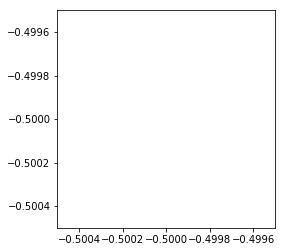

In [12]:
import matplotlib.pyplot as plt

plt.imshow(df, cmap = "hot", interpolation = "nearest")

plt.show()

C:\Python27\lib\site-packages\matplotlib\colors.py:823: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Python27\lib\site-packages\numpy\ma\core.py:2809: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


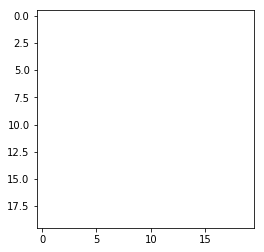

In [13]:
plt.imshow(df2, cmap = "hot", interpolation = "nearest")

plt.show()

In [14]:
import networkx as nx
import graphviz
import math

df_stack = df.stack().reset_index().rename(columns = {"level_0": "Node1", "level_1": "Node2", 0: "Similarity"})

mask = df_stack.Similarity < 0.02

column_name = "Similarity"

df_stack.loc[mask, column_name] = None

df_stack = df_stack.dropna()

network = nx.from_pandas_dataframe(df_stack, "Node1", "Node2", ["Similarity"])
# colors=range(len(df_stack))

lda_name_dict = lda1.name_dict

items = network.edges()

all_items = []

for item in items: 
    all_items.append(item[0])
    all_items.append(item[1])
    
dels = []
for item in lda_name_dict: 
    if item not in all_items: 
        dels.append(item)
        
for item in dels: 
    del lda_name_dict[item]

from collections import Counter
mapping = Counter(all_items)
nodes = network.nodes()
colors = [mapping[n] for n in nodes]
print colors


edges,weights = zip(*nx.get_edge_attributes(network,'Similarity').items())

# colors = [mapping[network.node[n]] for n in nodes]

    
plt.figure(3,figsize=(20,12))

pos = nx.circular_layout(network)
ec = nx.draw_networkx_edges(network, pos, alpha=0.2, width = 4,
#                             edgelist = edges,
                           edge_color = weights,
                           edge_cmap=plt.cm.gist_heat, 
                           )
nc = nx.draw_networkx_nodes(network, 
                            pos, 
                            nodelist=nodes, 
                            node_color=colors, 
                            cmap=plt.cm.gist_heat,
                            labels = lda_name_dict,
                           )

# edges=nx.draw_networkx_edges(network,pos=nx.spring_layout(network), width = 4)
nx.draw_networkx_labels(network,pos,lda_name_dict,font_size=10)
plt.colorbar(nc, label = "Nodes")
plt.colorbar(ec, label = "Edges")
plt.axis('off')
plt.show()

# nx.draw_networkx(network,
#                 labels = lda_name_dict,
#                 node_colour = colors,
#                 cmap=plt.cm.jet
#                 )

# plt.show()

[]


ValueError: need more than 0 values to unpack

In [ ]:
df_stack2 = df2.stack().reset_index().rename(columns = {"level_0": "Node1", "level_1": "Node2", 0: "Similarity"})

mask = df_stack2.Similarity < 0.04

column_name = "Similarity"

df_stack2.loc[mask, column_name] = None

df_stack2 = df_stack2.dropna()

# print df_stack2

network2 = nx.from_pandas_dataframe(df_stack2, "Node1", "Node2", ["Similarity"])

# colors=range(len(df_stack))
lda2.name_dict = {
    0: "Men victim of feminism",
    1: "Navbar",
    2: "Narrative and fiction",
    3: "Entreprenurs and future tech", 
    4: "ROK promotion",
    5: "Gym and Bodybuilding",
    6: "religious conservativism",
    7: "students and campus",
    8: "?",
    9: "Pickup Recounting",    
    10: "Western History",
    11: "US Election",
    12: "Racial Violence",
    13: "Alpha Advice", 
    14: "International Politics",
    15: "Site Spam",
    16: "Gender Dynamics",
    17: "Students and Campus",
    18: "Site Spam",
    19: "?",
}


lda_name_dict2 = lda2.name_dict
print lda2.name_dict

items = network2.edges()


all_items = []

for item in items: 
    all_items.append(item[0])
    all_items.append(item[1])
    
dels = []
for item in lda_name_dict2: 
    if item not in all_items: 
        dels.append(item)
        
for item in dels: 
    del lda_name_dict2[item]

mapping = Counter(all_items)
nodes = network2.nodes()
colors = [mapping[n] for n in nodes]
# print colors

# colors = [mapping[network.node[n]] for n in nodes]
edges,weights = zip(*nx.get_edge_attributes(network2,'Similarity').items())
weights = [x**2 for x in weights]

    
plt.figure(3,figsize=(12,12))

pos = nx.circular_layout(network2)
ec = nx.draw_networkx_edges(network2, pos, alpha=0.2, width = 4,
#                             edgelist = edges,
                           edge_color = weights,
                           edge_cmap=plt.cm.gist_heat, 
                           )
# ec = nx.draw_networkx_edges(network2, pos, alpha=0.2)
nc2 = nx.draw_networkx_nodes(network2, 
                            pos, 
                            nodelist=nodes, 
                            node_color=colors, 
#                             node_size=100, 
                            cmap=plt.cm.gist_heat, 
                            labels = lda_name_dict2,
                           )
nx.draw_networkx_labels(network2,pos,lda_name_dict2,font_size=10)

plt.colorbar(nc2, label = "Nodes")
plt.colorbar(ec, label = "Edges")
plt.axis('off')
plt.show()

# nx.draw_networkx(network,
#                 labels = lda_name_dict,
#                 node_colour = colors,
#                 cmap=plt.cm.jet
#                 )


In [ ]:
topics_vis = lda1.show_topics(20)

topics_vis = sorted(topics_vis, key = itemgetter(0))

# print topics_vis

print len(topics_vis)

topics_vis2 = lda2.show_topics(20)

topics_vis2 = sorted(topics_vis2, key = itemgetter(0))


print len(topics_vis2)

In [ ]:
from sklearn.cluster import SpectralClustering

numpy_array = df.as_matrix()

num_clusters = 5

spectral = SpectralClustering(num_clusters).fit_predict(numpy_array)

for second_topic_num in range(num_clusters):
    print second_topic_num
    for second_cluster, topic in zip(spectral, topics_vis):
        if second_topic_num == second_cluster:
#             print lda1.name_dict[topic[0]]
            print topic
    print " "
    print ""

In [ ]:
from sklearn.cluster import SpectralClustering

numpy_array = df2.as_matrix()

num_clusters = 3

spectral = SpectralClustering(num_clusters).fit_predict(numpy_array)

for second_topic_num in range(num_clusters):
    print second_topic_num
    for second_cluster, topic in zip(spectral, topics_vis):
        if second_topic_num == second_cluster:
            print lda2.name_dict[topic[0]]
            print topic
    print " "
    print ""

In [ ]:
# import pyLDAvis.gensim

# pyLDAvis.enable_notebook()
# pyLDAvis.gensim.prepare(lda1, corp, dictionary)